## E3 Fundamentals of Visualization libraries Part 1 ß Matplotlib

In [1]:
# importing libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import matplotlib as mpl 


In [2]:
import matplotlib
matplotlib.__version__

'3.10.0'

In [3]:
# importing newyork data file

df = pd.read_csv("newyork_data.csv", index_col=0, nrows=1000000, low_memory=False)  # loading the first 1 million rows

In [4]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [5]:
df.drop(columns = {'_merge'}, inplace = True)

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,63AF72AB3CD47753,classic_bike,2022-01-13 21:36:47.689,2022-01-13 21:46:02.024,5 Ave & E 63 St,6904.06,Broadway & W 51 St,6779.04,40.766368,-73.971518,40.762288,-73.983362,member,2022-01-13,4.0
1,9C0DAD8C1E0EA571,classic_bike,2022-01-16 17:56:23.889,2022-01-16 18:03:50.269,Grand Army Plaza & Plaza St West,4010.15,Bedford Ave & Montgomery St,3736.03,40.672968,-73.970880,40.665816,-73.956934,member,2022-01-16,-8.0
2,9576DDD8920974F5,electric_bike,2022-01-18 07:10:04.799,2022-01-18 07:20:54.450,W 20 St & 10 Ave,6306.01,Broadway & W 51 St,6779.04,40.745686,-74.005141,40.762288,-73.983362,member,2022-01-18,1.8
3,962A466CC3AC6781,classic_bike,2022-01-22 12:10:10.225,2022-01-22 12:20:06.899,W 54 St & 9 Ave,6920.03,10 Ave & W 28 St,6459.04,40.765849,-73.986905,40.750664,-74.001768,member,2022-01-22,-5.9
4,C2585407BA0FE3E9,classic_bike,2022-01-08 16:35:16.497,2022-01-08 16:45:33.279,Sharon St & Olive St,5323.05,Driggs Ave & Lorimer St,5481.04,40.715353,-73.938560,40.721791,-73.950415,casual,2022-01-08,-2.5


In [7]:
df.shape

(1000000, 15)

In [8]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [13]:
df['date'] = pd.to_datetime(df['date'])   # Ensuring that the "date" column is in datetime format:

In [14]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

# Basic Plotting with Pandas

In [15]:
df_temp = df.set_index('date')     # setting as index

In [16]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-13,63AF72AB3CD47753,classic_bike,2022-01-13 21:36:47.689,2022-01-13 21:46:02.024,5 Ave & E 63 St,6904.06,Broadway & W 51 St,6779.04,40.766368,-73.971518,40.762288,-73.983362,member,4.0
2022-01-16,9C0DAD8C1E0EA571,classic_bike,2022-01-16 17:56:23.889,2022-01-16 18:03:50.269,Grand Army Plaza & Plaza St West,4010.15,Bedford Ave & Montgomery St,3736.03,40.672968,-73.970880,40.665816,-73.956934,member,-8.0
2022-01-18,9576DDD8920974F5,electric_bike,2022-01-18 07:10:04.799,2022-01-18 07:20:54.450,W 20 St & 10 Ave,6306.01,Broadway & W 51 St,6779.04,40.745686,-74.005141,40.762288,-73.983362,member,1.8
2022-01-22,962A466CC3AC6781,classic_bike,2022-01-22 12:10:10.225,2022-01-22 12:20:06.899,W 54 St & 9 Ave,6920.03,10 Ave & W 28 St,6459.04,40.765849,-73.986905,40.750664,-74.001768,member,-5.9
2022-01-08,C2585407BA0FE3E9,classic_bike,2022-01-08 16:35:16.497,2022-01-08 16:45:33.279,Sharon St & Olive St,5323.05,Driggs Ave & Lorimer St,5481.04,40.715353,-73.938560,40.721791,-73.950415,casual,-2.5


<Axes: xlabel='date'>

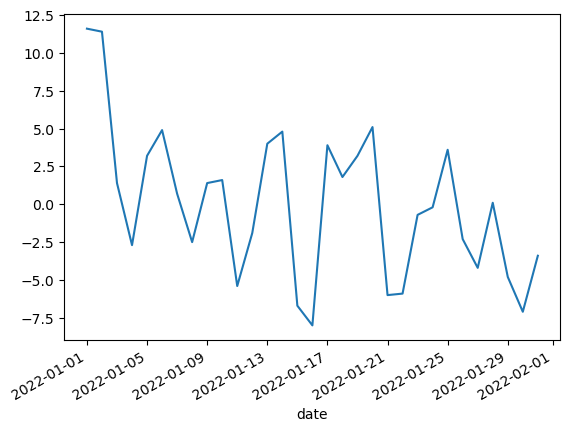

In [17]:
df_temp['avgTemp'].sort_index().plot()

# following the procedural approach

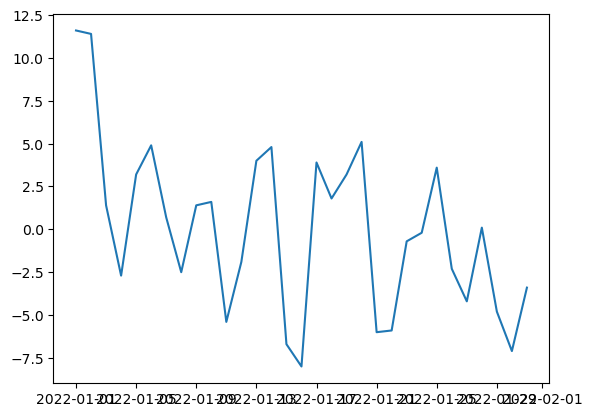

In [19]:
plt.plot(df_temp['avgTemp'].sort_index())
plt.show()

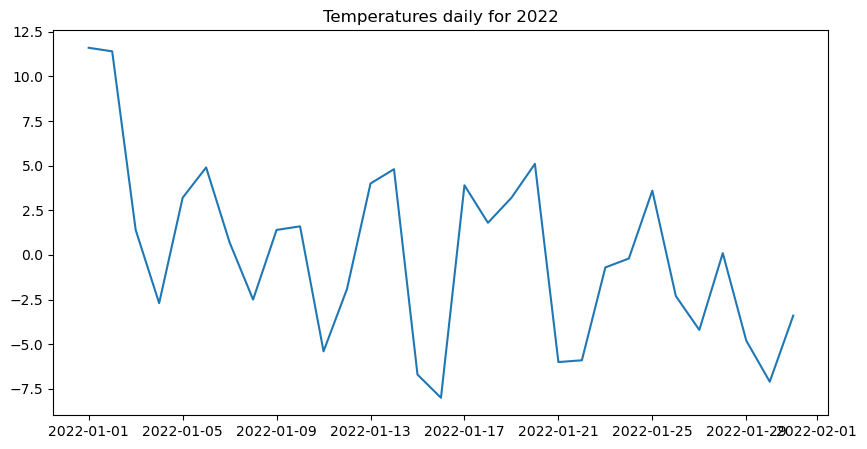

In [23]:
plt.figure(figsize=(10,5))
plt.title('Temperatures daily for 2022')
plt.plot(df_temp['avgTemp'].sort_index())
plt.show()

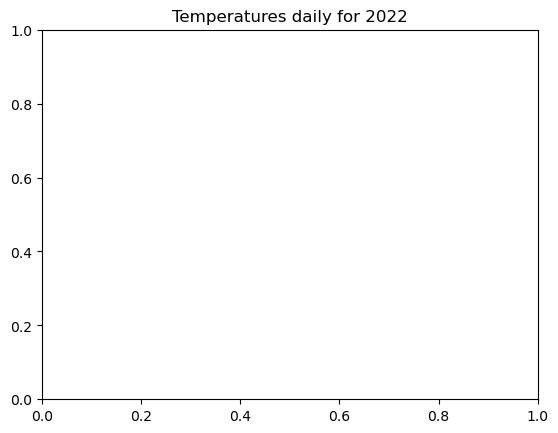

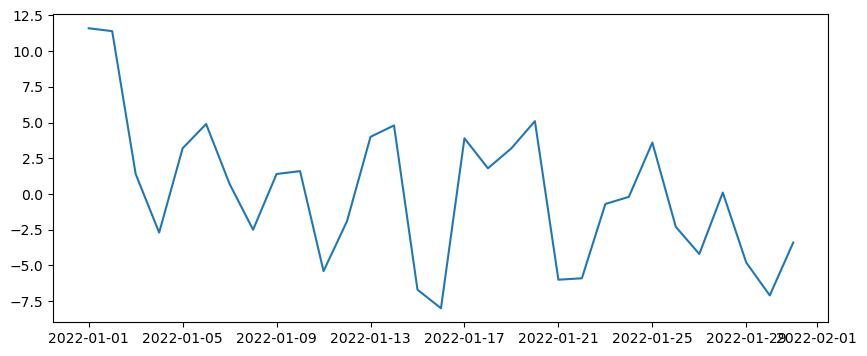

In [26]:
plt.title('Temperatures daily for 2022')
plt.figure(figsize=(10,4))
plt.plot(df_temp['avgTemp'].sort_index())
plt.show()

# For aggregate trips

In [27]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [28]:
# Groupingby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [29]:
df_group.head()

,date,ride_id
0,2021-07-22,1
1,2021-09-13,1
2,2021-11-07,1
3,2021-11-09,1
4,2021-11-13,1


In [38]:
print(df.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


In [39]:
# Renaming column in the grouped dataframe
df_group.rename(columns={'ride_id': 'bike_rides_daily'}, inplace=True)

# Merging and giving the indicator a new name to avoid conflict
df = df.merge(df_group, on="date", how='outer', indicator='_merge_flag')

# Checking the merge counts
print(df['_merge_flag'].value_counts(dropna=False))

# Checking specific dates
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape)
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape)

# Setting date as index
df_temp = df.set_index('date')

# Printing columns to confirm
print(df_temp.columns)


_merge_flag
both          1000000
left_only           0
right_only          0
Name: count, dtype: int64
Shape of January 1st is (19980, 19)
Shape of January 2nd is (42122, 19)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily_x', '_merge',
       'bike_rides_daily_y', '_merge_flag'],
      dtype='object')


In [40]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily_x,_merge,bike_rides_daily_y,_merge_flag
date,,,,,,,,,,,,,,,,,,
2021-07-22,2F298092D779509A,classic_bike,2021-07-22 11:49:56.126,2022-01-21 13:15:37.645,Stanton St & Norfolk St,5445.07,Pier 40 Dock Station,SYS035,40.720747,-73.986274,40.728660,-74.011980,casual,NaN,1,both,1,both
2021-09-13,84EA4DA50AC94A38,classic_bike,2021-09-13 10:30:02.129,2022-01-20 08:18:25.716,E 14 St & Avenue B,5736.09,58 St & 2 Ave - Brooklyn Army Terminal Vaccina...,3138.09,40.729387,-73.977724,40.644512,-74.021506,casual,NaN,1,both,1,both
2021-11-07,4D62825A6FC8FB5C,classic_bike,2021-11-07 11:15:10.792,2022-01-16 00:59:11.717,Hazen St & 20 Ave,7032.06,Brook Ave & E 138 St,7707.08,40.772092,-73.895166,40.807408,-73.919240,casual,NaN,1,both,1,both
2021-11-09,218009D78518E321,classic_bike,2021-11-09 17:38:12.125,2022-01-15 11:39:13.470,Central Park North & Adam Clayton Powell Blvd,7617.07,NaN,NaN,40.799484,-73.955613,NaN,NaN,casual,NaN,1,both,1,both
2021-11-13,8BF20A472C20229F,classic_bike,2021-11-13 09:15:29.510,2022-01-03 08:24:16.684,Grand Concourse & E 164 St,8057.02,Fulton St & Pearl St,5024.09,40.829608,-73.921461,40.707722,-74.004386,casual,NaN,1,both,1,both


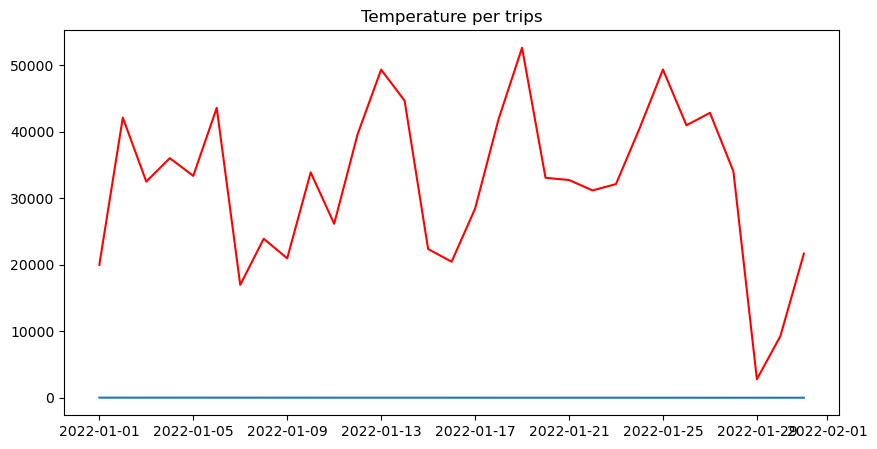

In [48]:
# Filtering for 2022 using dt.year
df_temp_2022 = df_temp[df_temp.index.year == 2022]

plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df_temp_2022['avgTemp'])
plt.plot(df_temp_2022['bike_rides_daily_y'], color = 'red')
plt.show()

### The OO approach

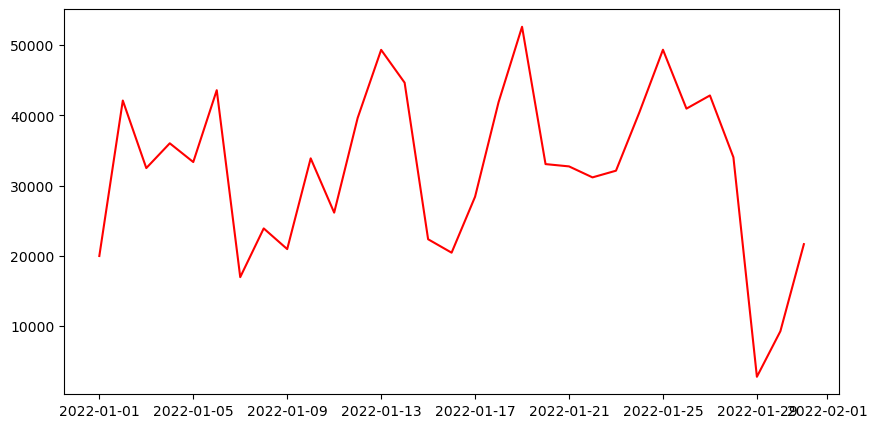

In [51]:
# Create figure and axis objects with subplots()

# Filtering for 2022 using dt.year
df_temp_2022 = df_temp[df_temp.index.year == 2022]

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp_2022.index, df_temp_2022['bike_rides_daily_y'], color='red')


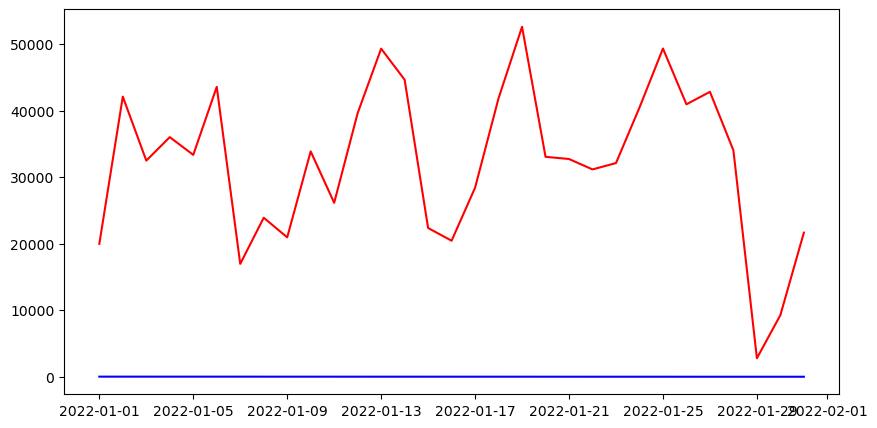

In [53]:
# Create figure and axis objects with subplots()

# Filtering for 2022 using dt.year
df_temp_2022 = df_temp[df_temp.index.year == 2022]

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp_2022['bike_rides_daily_y'],color = "red")
ax.plot(df_temp_2022['avgTemp'], color = 'blue')

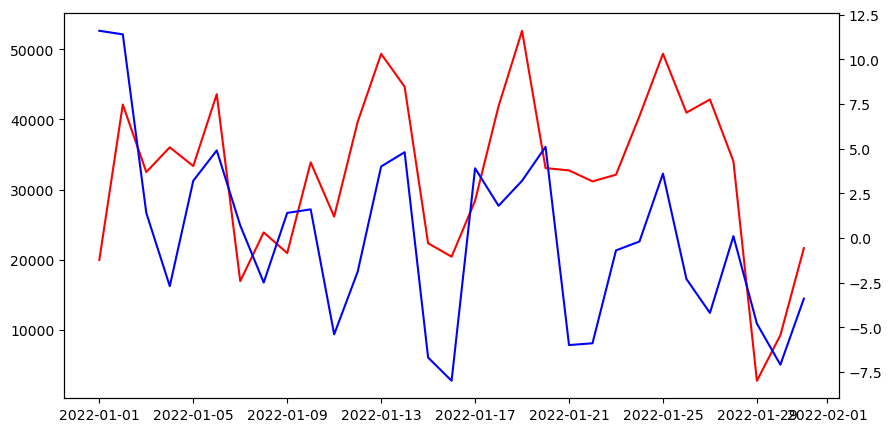

In [55]:
# Create figure and axis objects with subplots()

# Filtering for 2022 using dt.year
df_temp_2022 = df_temp[df_temp.index.year == 2022]

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp_2022['bike_rides_daily_y'],color = "red")

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp_2022["avgTemp"], color = "blue")
plt.show()

#### The Final dual plot

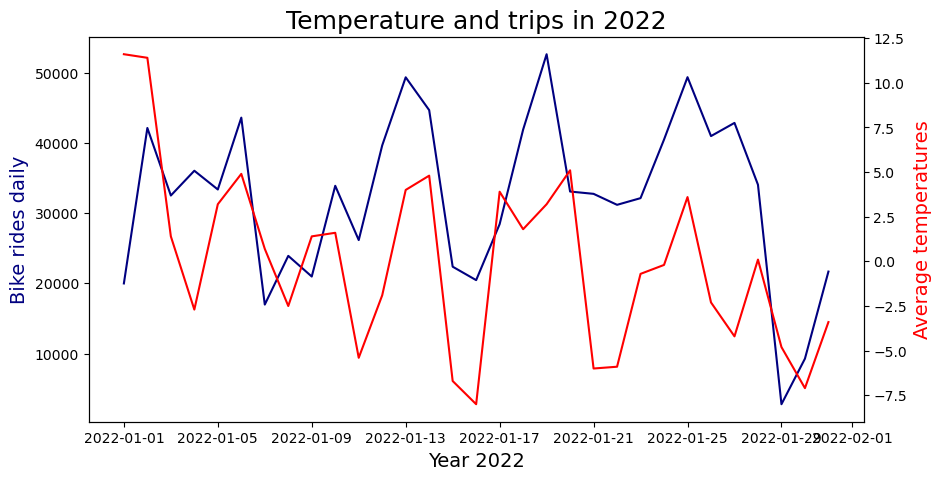

In [58]:
# Create figure and axis objects with subplots() and details

# Filtering for 2022 using dt.year
df_temp_2022 = df_temp[df_temp.index.year == 2022]

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp_2022['bike_rides_daily_y'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp_2022["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

In [59]:
plt.style.use('ggplot')

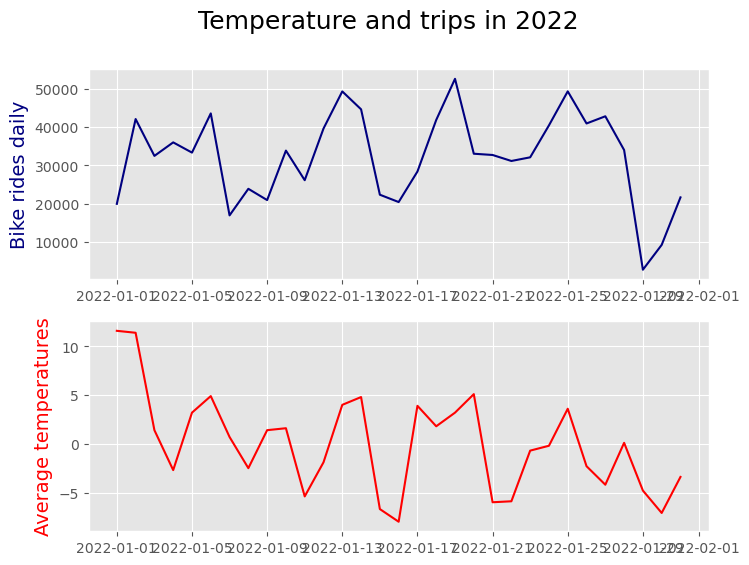

In [60]:
# Create figure and axis objects with subplots() and details

# Filtering for 2022 using dt.year
df_temp_2022 = df_temp[df_temp.index.year == 2022]

fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df_temp_2022['bike_rides_daily_y'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp_2022["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2022', fontsize = 18)

plt.show()

In [61]:
# save the plot as a file
fig.savefig('trips_temperatures_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


### creating a histogram

In [63]:
# Ensuring 'started_at' and 'ended_at' are datetime
df_temp['started_at'] = pd.to_datetime(df_temp['started_at'])
df_temp['ended_at'] = pd.to_datetime(df_temp['ended_at'])

# Creating a new column 'tripduration' in seconds
df_temp['tripduration'] = (df_temp['ended_at'] - df_temp['started_at']).dt.total_seconds()

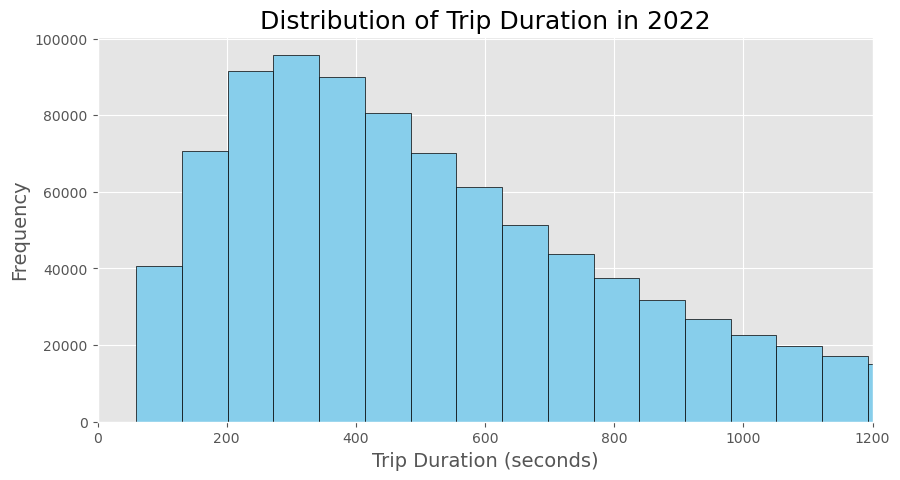

In [69]:
# Filtering for 2022 using dt.year

df_temp_2022 = df_temp[df_temp.index.year == 2022]

# Keeping trips up to 1 hour (3600 seconds) so bins are not skewed
df_2022_filtered = df_temp_2022[df_temp_2022['tripduration'] <= 3600]


# Creating figure and axis objects
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting histogram
ax.hist(df_2022_filtered['tripduration'], bins=50, color='skyblue', edgecolor='black')
ax.set_xlim(0, 1200)  # Only show trips up to 1 hour (3600 seconds) so bins are not skewed

# Setting labels and title
ax.set_xlabel("Trip Duration (seconds)", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
plt.title("Distribution of Trip Duration in 2022", fontsize=18)

# Show plot
plt.show()


# Adding a curve on the bins

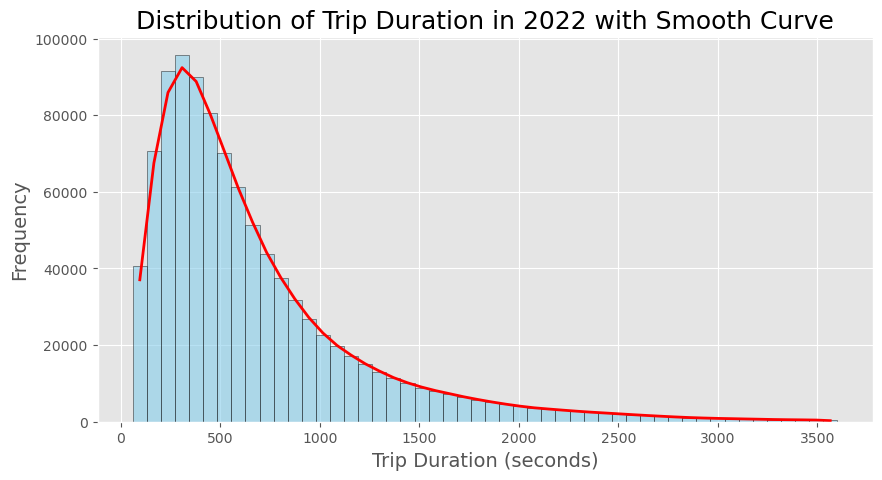

In [74]:
# Filter trips up to 1 hour (3600 seconds)
df_2022_filtered = df_temp_2022[df_temp_2022['tripduration'] <= 3600]
data = df_2022_filtered['tripduration']

# Create histogram
counts, bins = np.histogram(data, bins=50)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Smooth the counts using a simple moving average
window_size = 3
smoothed_counts = np.convolve(counts, np.ones(window_size)/window_size, mode='same')

# Plot
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(bin_centers, counts, width=bins[1]-bins[0], color='skyblue', edgecolor='black', alpha=0.6)
ax.plot(bin_centers, smoothed_counts, color='red', linewidth=2)  # overlay smooth curve

ax.set_xlabel("Trip Duration (seconds)", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
plt.title("Distribution of Trip Duration in 2022 with Smooth Curve", fontsize=18)
plt.show()


In [77]:
# save the plot as a file
fig.savefig('trips_duration_curve_2022.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

### Creating a figure with two axes that represent different plots

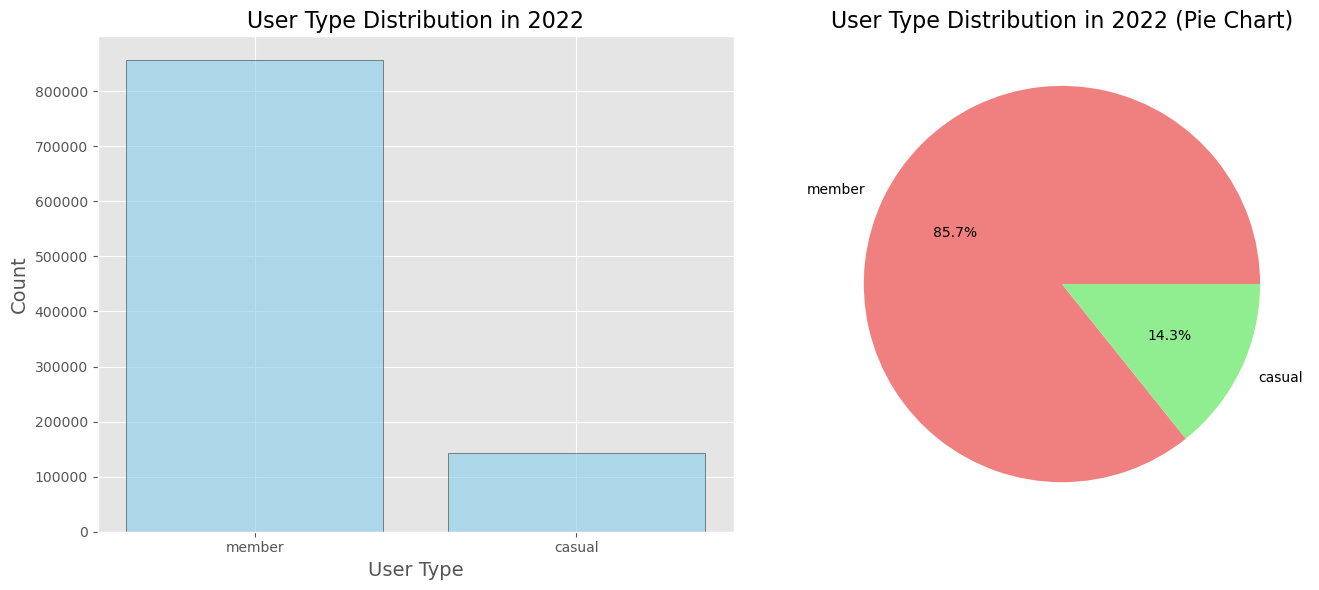

In [76]:
# Filtering 2022 data
df_2022 = df_temp[df_temp.index.year == 2022]

# Counting values for 'member_casual'
member_counts = df_2022['member_casual'].value_counts()

# Creating figure with two axes (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# ---- Bar chart ----
ax1.bar(member_counts.index, member_counts.values, color='skyblue', edgecolor='black', alpha=0.6)
ax1.set_xlabel("User Type", fontsize=14)
ax1.set_ylabel("Count", fontsize=14)
ax1.set_title("User Type Distribution in 2022", fontsize=16)

# ---- Pie chart ----
ax2.pie(member_counts.values, labels=member_counts.index, autopct='%1.1f%%', colors=['lightcoral','lightgreen'])
ax2.set_title("User Type Distribution in 2022 (Pie Chart)", fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

In [78]:
# save the plot as a file
fig.savefig('user_type_dual_dist.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')